In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [5]:
chemin = 'C:/Users/Sonia/Bureau/LAYOUT_SEATGURU'

In [6]:
data=pd.read_csv('C:/Users/Sonia/Desktop/SEATGURU_INFO_AIRCRAFT.csv')
df=pd.DataFrame.from_csv('C:/Users/Sonia/Desktop/SEATGURU_INFO_AIRCRAFT.csv',encoding = "utf-8", sep=';')
dfetud=df[4000:5000]

C:\Users\sonia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [7]:
dfetud

,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,Recline,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
Data_Source,,,,,,,,,,,,,,,,,,,,,
SeatGuru,dragonair,Airlines Airbus A330-300 A,BUSINESS,long haul,42,280,Business,RECLINER,NORMAL,NaN,...,20,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,2
SeatGuru,dragonair,Airlines Airbus A330-300 A,BUSINESS,long haul,42,280,Business,RECLINER,BULKHEAD,NaN,...,20,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,2
SeatGuru,dragonair,Airlines Airbus A330-300 A,FIRST,long haul,8,280,First Class,FLAT_BED,NORMAL,180 degree,...,21,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,3
SeatGuru,dragonair,Airlines Airbus A330-300 A,ECONOMY,long haul,230,280,Economy,STANDARD,BULKHEAD,NaN,...,18,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,2
SeatGuru,dragonair,Airlines Airbus A330-300 A,ECONOMY,long haul,230,280,Economy,STANDARD,NORMAL,NaN,...,18,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,3
SeatGuru,dragonair,Airlines Airbus A330-300 A,ECONOMY,long haul,230,280,Economy,STANDARD,NORMAL,NaN,...,18,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,2
SeatGuru,dragonair,Airlines Airbus A330-300 A,ECONOMY,long haul,230,280,Economy,STANDARD,EXIT_ROW,NaN,...,18,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,4
SeatGuru,dragonair,Airlines Airbus A330-300 A,ECONOMY,long haul,230,280,Economy,STANDARD,NORMAL,NaN,...,18,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,1
SeatGuru,dragonair,Airlines Airbus A330-300 B,BUSINESS,long haul,42,307,Business,RECLINER,BULKHEAD,NaN,...,20,NaN,NaN,ON_DEMAND,ON_DEMAND,ALL,AC,ALL,CONNECT,2


In [8]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd

data_path = "C:/Users/Sonia/Desktop/"

# Helpful Functions  (cf.Cyril GAILLARD)

In [9]:
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

def longestValue(inputList):
    if len(inputList) > 0:
        max_len = 0
        for i, el in enumerate(inputList):
            if len(el) > max_len:
                max_len = i
        return inputList[max_len]
    return 0

def get_relevant_aircraft_builders(image_names, proportion_min=0.02, proportion_max=0.75):
    # retrieve aircraft types
    aircraft_builders = np.unique([a_type.split(' ')[0].lower() for a_type in pd.read_csv(data_path + 'SEATGURU_INFO_AIRCRAFT.csv', sep=';')['Aircraft_Type'].tolist() if len(a_type.split(' ')) > 1])
    
    # remove aircraft_builder that have Numerics in it
    aircraft_builders = [a_builder for a_builder in  aircraft_builders if not hasNumbers(a_builder) and len(a_builder) > 2]
    
    # remove aircraft with too low occurences in the "IMAGES_NAMES" list
    relevant_aircraft_builders = {}
    for a_builder in aircraft_builders:
        proportion = sum([1for img_n in image_names if a_builder in img_n.lower()]) / len(image_names)
        if proportion > proportion_min and proportion < proportion_max:
            relevant_aircraft_builders[a_builder] = proportion

    # remove non aircradft builder that remain
    del relevant_aircraft_builders['airlines']
    del relevant_aircraft_builders['irbus']
    del relevant_aircraft_builders['airways']
    del relevant_aircraft_builders['ays']

    
    # sort by proportion
    relevant_aircraft_builders = {k: v for k, v in sorted(relevant_aircraft_builders.items(), key=lambda item: item[1])}
    return relevant_aircraft_builders

def get_airline_aircraft_builder_pos(image_names, aircraft_builders, airlines, aircraft_ref, pattern):
    # Initialisation of dict
    dictio_airlines_aircraft_builders = []
        
    for image_name in image_names:
        dictio_airlines_aircraft_builders.append({
            'image_name': image_name,
            'aircraft_builder': '', 
            'position_aircraft_builder': -1, 
            'airline': '',
            'aircraft_ref': []
        })
        
        last_el = len(dictio_airlines_aircraft_builders) - 1
        # initiliase position
        position = -1
        # a little pre-process to clean-up image name
        img_inf = image_name.lower().split('.')[0].split(pattern)

        for i, item in enumerate(img_inf):
            for a_builder in aircraft_builders:
                # check if the image contains the aircraft builder
                if a_builder == item:
                    # add the aircraft builder in the image name
                    position = i
                    dictio_airlines_aircraft_builders[last_el]['aircraft_builder'] = a_builder
                    
        if position == -1: dictio_airlines_aircraft_builders[last_el]['aircraft_builder'] = 'not_relevant_aircraft_builders'
        dictio_airlines_aircraft_builders[last_el]['position_aircraft_builder'] = position
        
        # add airlines deduce by the image name
        for airline in airlines:
            if airline + pattern in image_name.lower():
                dictio_airlines_aircraft_builders[last_el]['airline'] = airline
                
        # add aircraft_ref
        for a_ref in aircraft_ref:
            if a_ref in  image_name.lower():
                 dictio_airlines_aircraft_builders[last_el]['aircraft_ref'].append(a_ref)
        # take the longest str element in the list of ref
        dictio_airlines_aircraft_builders[last_el]['aircraft_ref'] = longestValue(dictio_airlines_aircraft_builders[last_el]['aircraft_ref'])
    
    return dictio_airlines_aircraft_builders

In [10]:
# LAYOUT SEATGURU


In [11]:
def main_layout_seatguru(layout):
    images = [data_path + layout + img for img in os.listdir(data_path + layout)]
    IMAGE_NAMES = [img for img in os.listdir(data_path + layout)]
    
    relevant_aircraft_builders = get_relevant_aircraft_builders(IMAGE_NAMES)
    airlines = pd.read_csv(data_path + 'SEATGURU_INFO_AIRCRAFT.csv', sep=';')['Airline_name'].unique()
    airlines = [airline.replace('-','_') for airline in airlines] 

    aircraft_ref = np.unique([a_type.lower() for a_type in pd.read_csv(data_path + 'SEATGURU_INFO_AIRCRAFT.csv', sep=';')['Aircraft_Type'].tolist()])
    aircraft_ref = np.unique([t for text in aircraft_ref  for t in text.split(' ') if hasNumbers(t)])
    
    dictio_airlines_aircraft_builders = get_airline_aircraft_builder_pos(IMAGE_NAMES, relevant_aircraft_builders, airlines, aircraft_ref, '_')
    return pd.DataFrame(dictio_airlines_aircraft_builders)

layout = "LAYOUT_SEATGURU/"
df_layout_seatguru = main_layout_seatguru(layout)
df_layout_seatguru[df_layout_seatguru['aircraft_ref'] == 'a350']

,aircraft_builder,aircraft_ref,airline,image_name,position_aircraft_builder
804,not_relevant_aircraft_builders,a350,,Philipine_Airlines_A350_plane703.svg.png,-1
850,airbus,a350,qatar_airways,Qatar_Airways_Airbus_A350_plane732.svg.png,2


# LAYOUT SEATMAESTRO


In [12]:
def main_layout_seatguru(layout):
    images = [data_path + layout + img for img in os.listdir(data_path + layout)]
    IMAGE_NAMES = [img for img in os.listdir(data_path + layout)]
    
    relevant_aircraft_builders = get_relevant_aircraft_builders(IMAGE_NAMES)
    airlines = pd.read_csv(data_path + 'SEATGURU_INFO_AIRCRAFT.csv', sep=';')['Airline_name'].unique()

    aircraft_ref = np.unique([a_type.lower() for a_type in pd.read_csv(data_path + 'SEATGURU_INFO_AIRCRAFT.csv', sep=';')['Aircraft_Type'].tolist()])
    aircraft_ref = np.unique([t for text in aircraft_ref  for t in text.split(' ') if hasNumbers(t)])
    
    dictio_airlines_aircraft_builders = get_airline_aircraft_builder_pos(IMAGE_NAMES, relevant_aircraft_builders, airlines, aircraft_ref, '-')
    return pd.DataFrame(dictio_airlines_aircraft_builders)

layout = "LAYOUT_SEATMAESTRO/"
df_layout_seatmaestro = main_layout_seatguru(layout)
df_layout_seatmaestro[df_layout_seatmaestro['aircraft_ref'] == 'a350']

,aircraft_builder,aircraft_ref,airline,image_name,position_aircraft_builder
924,airbus,a350,,latam-airlines-brasil-airbus-a350.png,3
1381,airbus,a350,vietnam-airlines,vietnam-airlines-airbus-a350-config-1.png,2
1382,airbus,a350,vietnam-airlines,vietnam-airlines-airbus-a350-config-2.png,2


In [13]:
df_layout_seatguru['image_name'].tolist()[0]

'Aegean_Airlines_Airbus_A319-100_plane1.svg.png'

# FIRST PRE-PROCESS

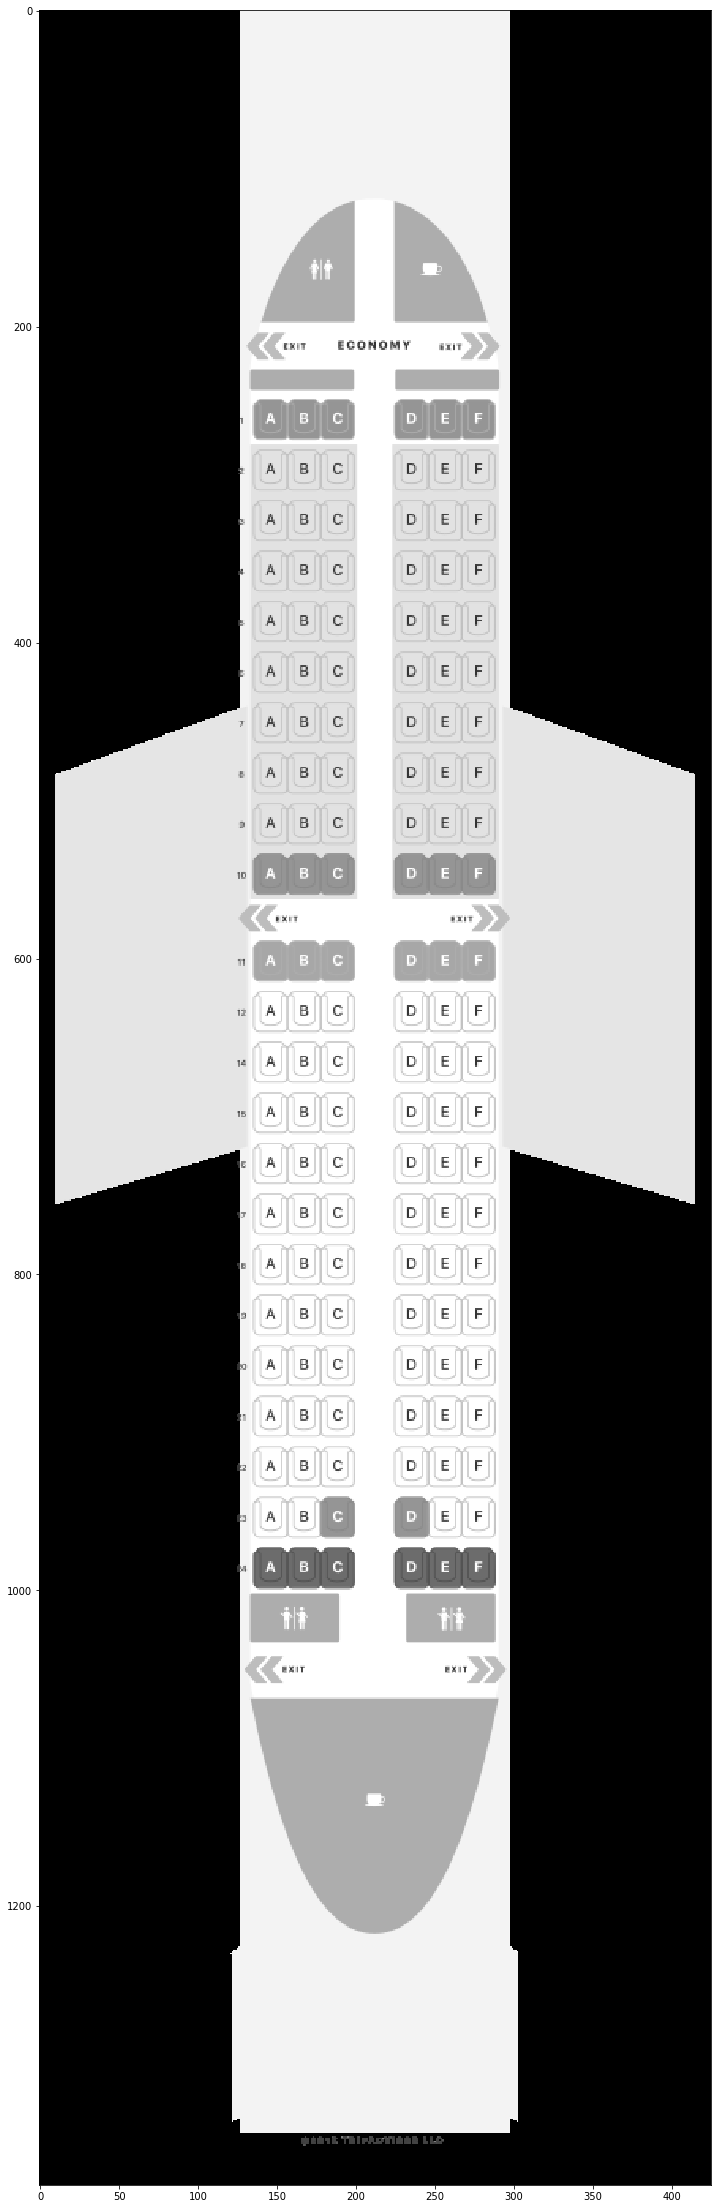

In [14]:
layout = "LAYOUT_SEATGURU/"
data_path + layout + df_layout_seatguru['image_name'].tolist()[0]

img = plt.imread(data_path + layout + df_layout_seatguru['image_name'].tolist()[0])
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(20,40))
plt.imshow(imgray, cmap='gray')

# Erosion

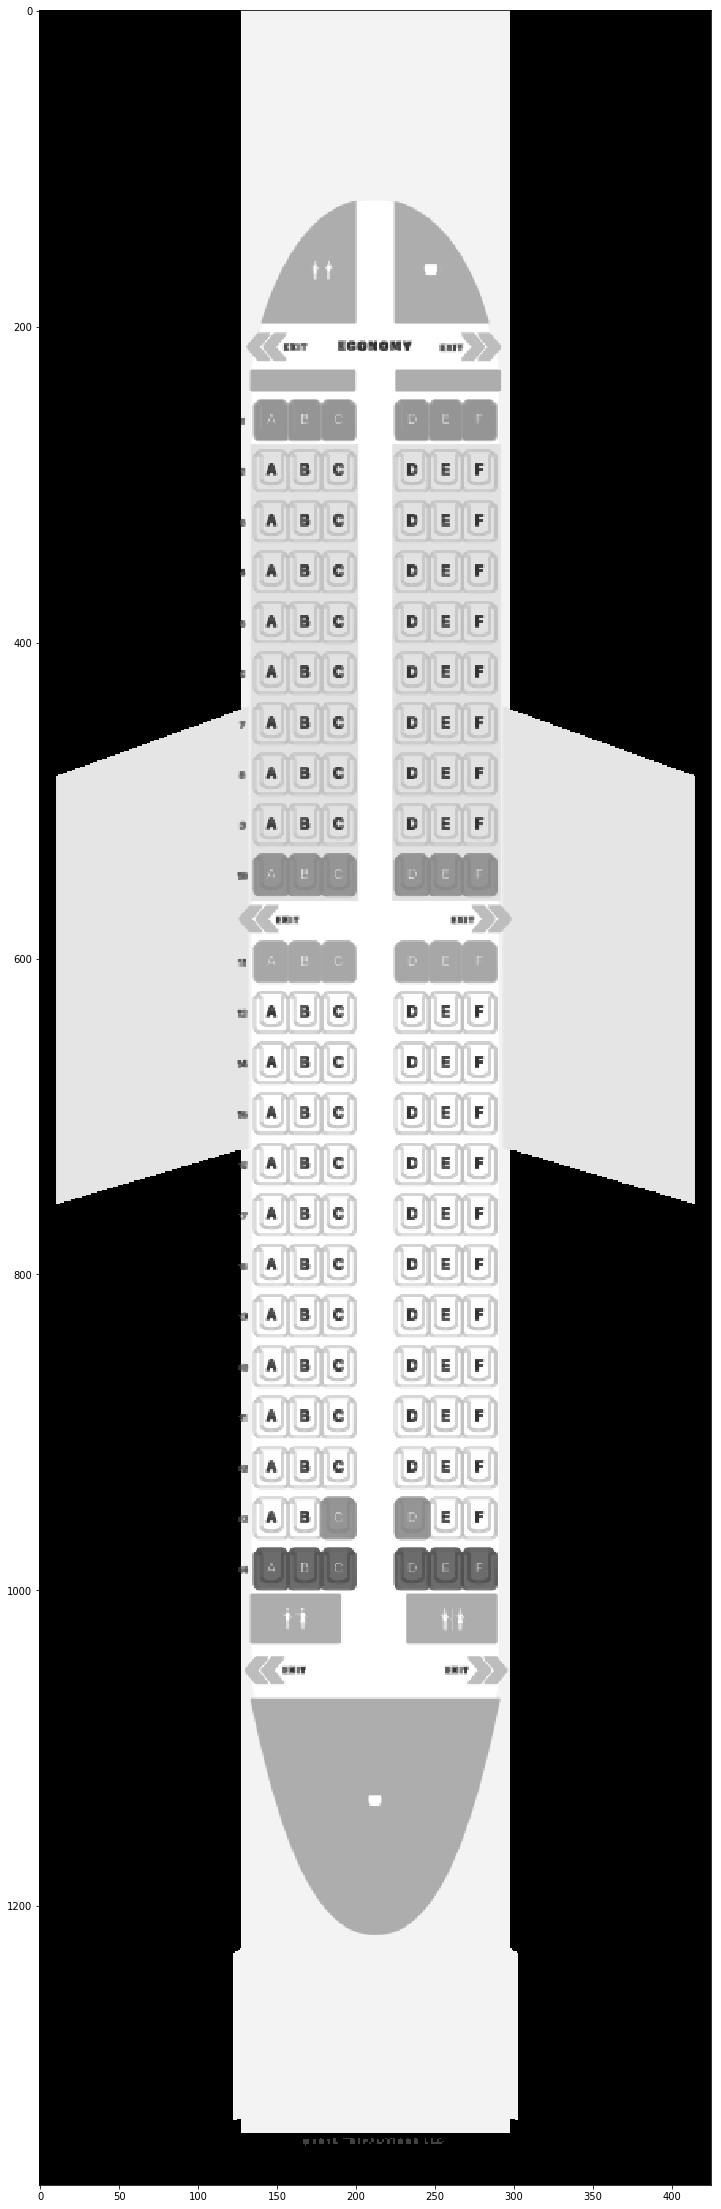

In [15]:
kernel = np.ones((2,2),np.uint8)
erosion = cv.erode(imgray,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(erosion, cmap='gray')

# Dilation

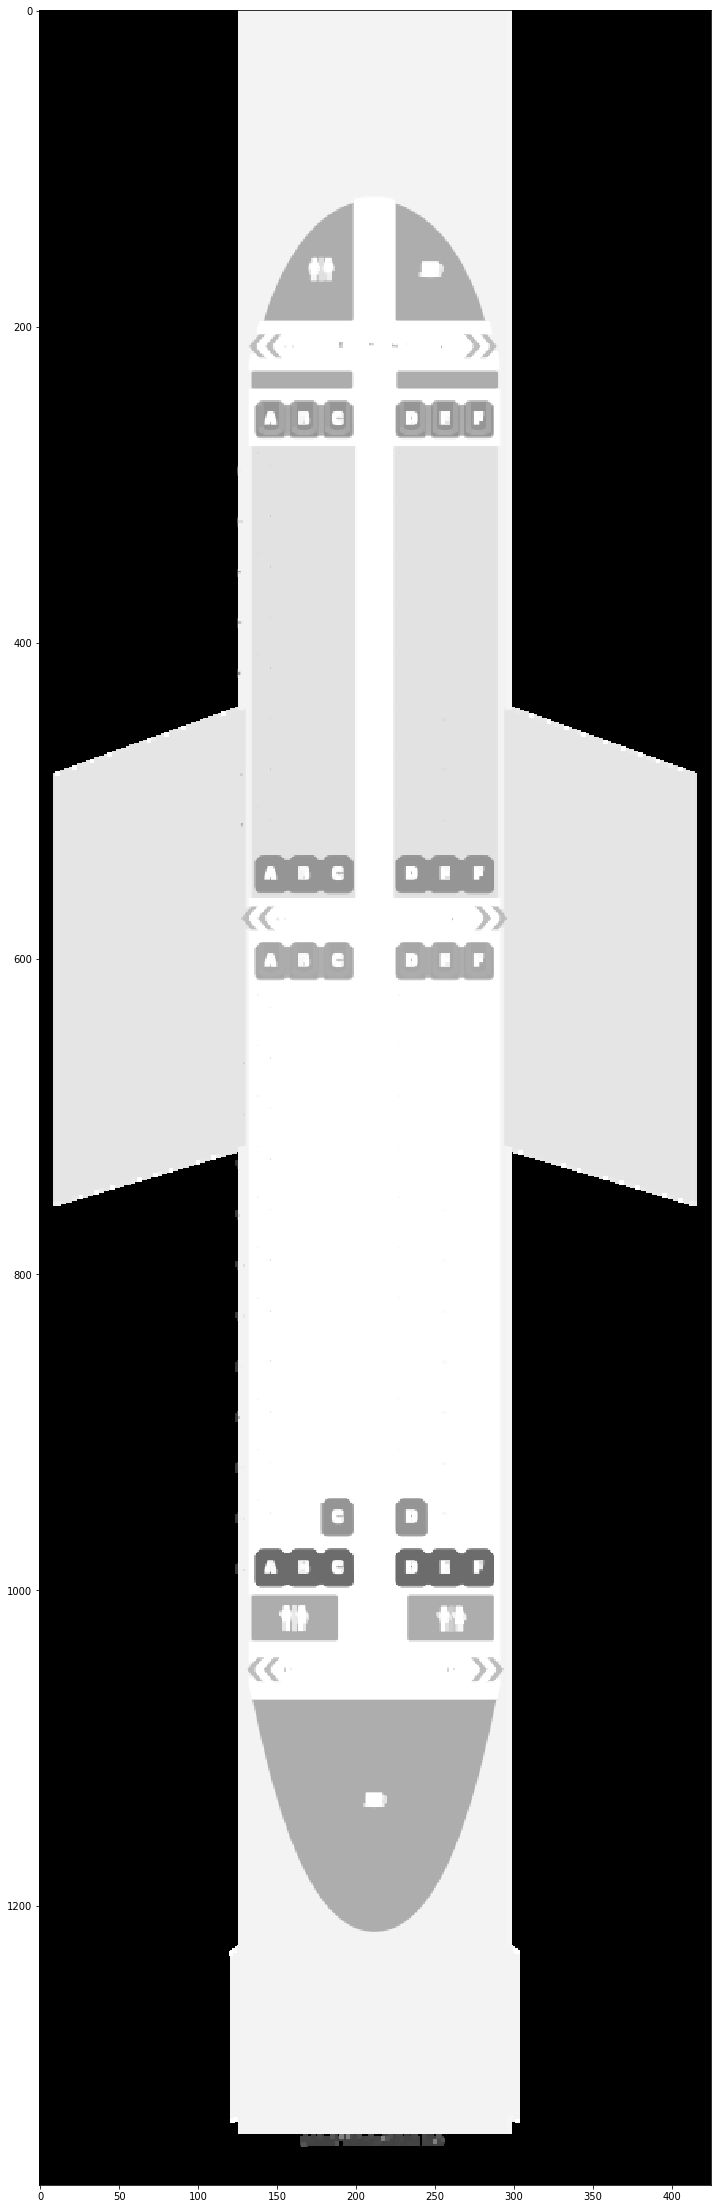

In [16]:
kernel = np.ones((3,3),np.uint8)
dilation = cv.dilate(imgray,kernel,iterations = 1)
plt.figure(figsize=(20,40))
plt.imshow(dilation, cmap='gray')

# Opening

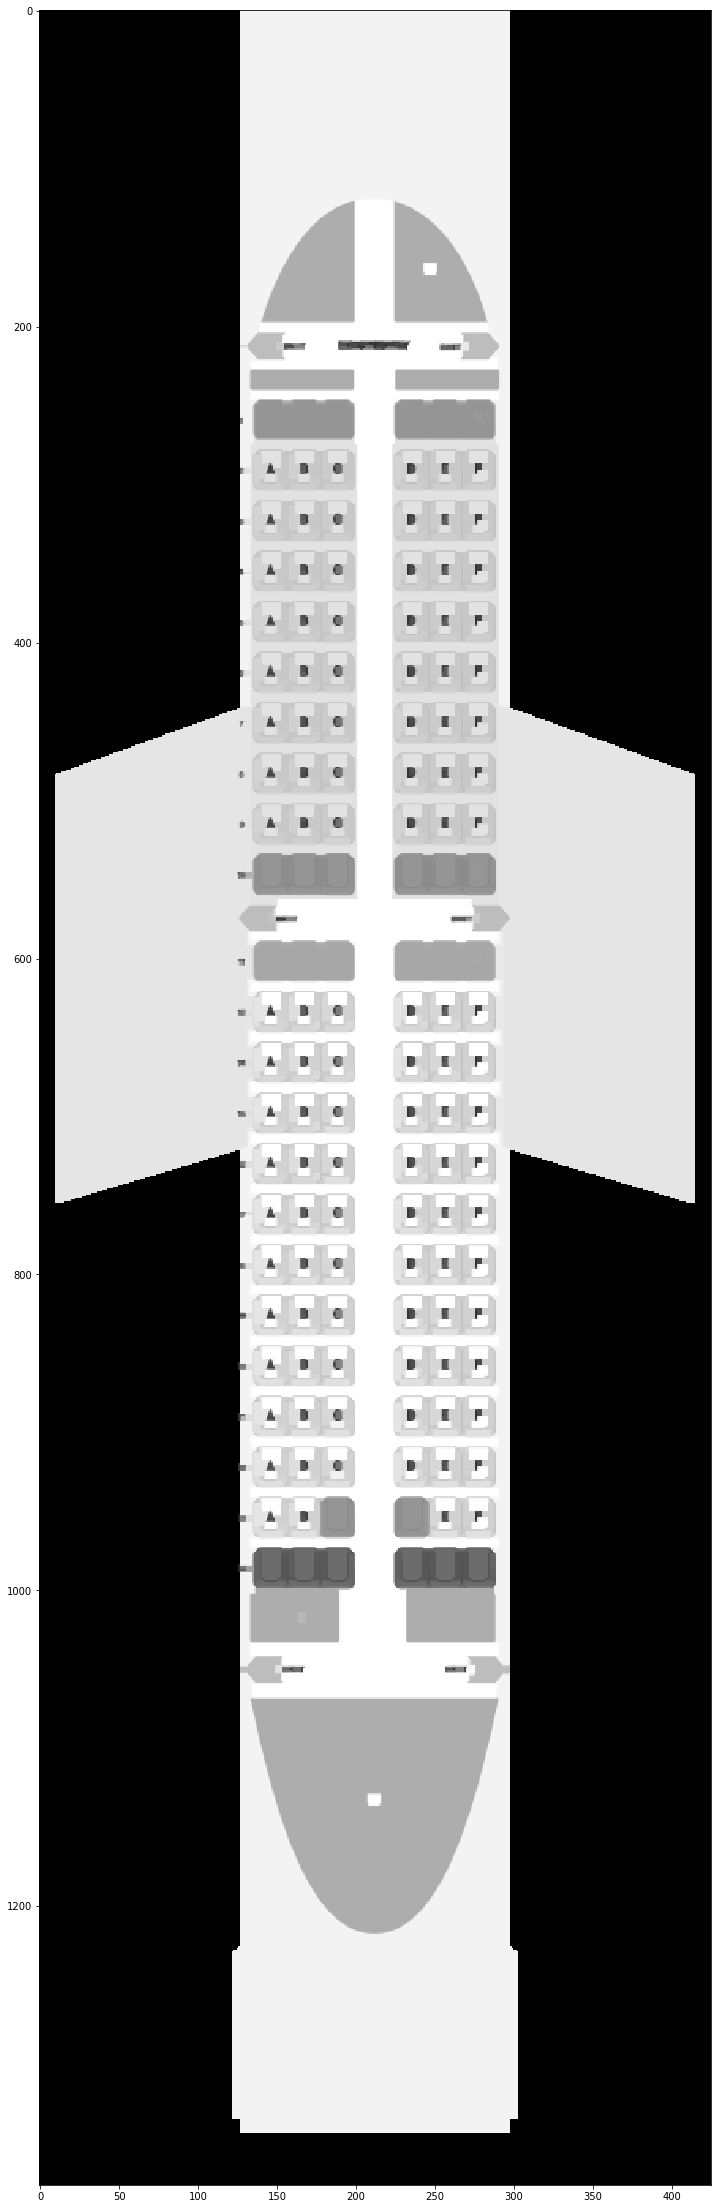

In [17]:
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(imgray, cv.MORPH_OPEN, kernel)
plt.figure(figsize=(20,40))
plt.imshow(opening, cmap='gray')

# Closing

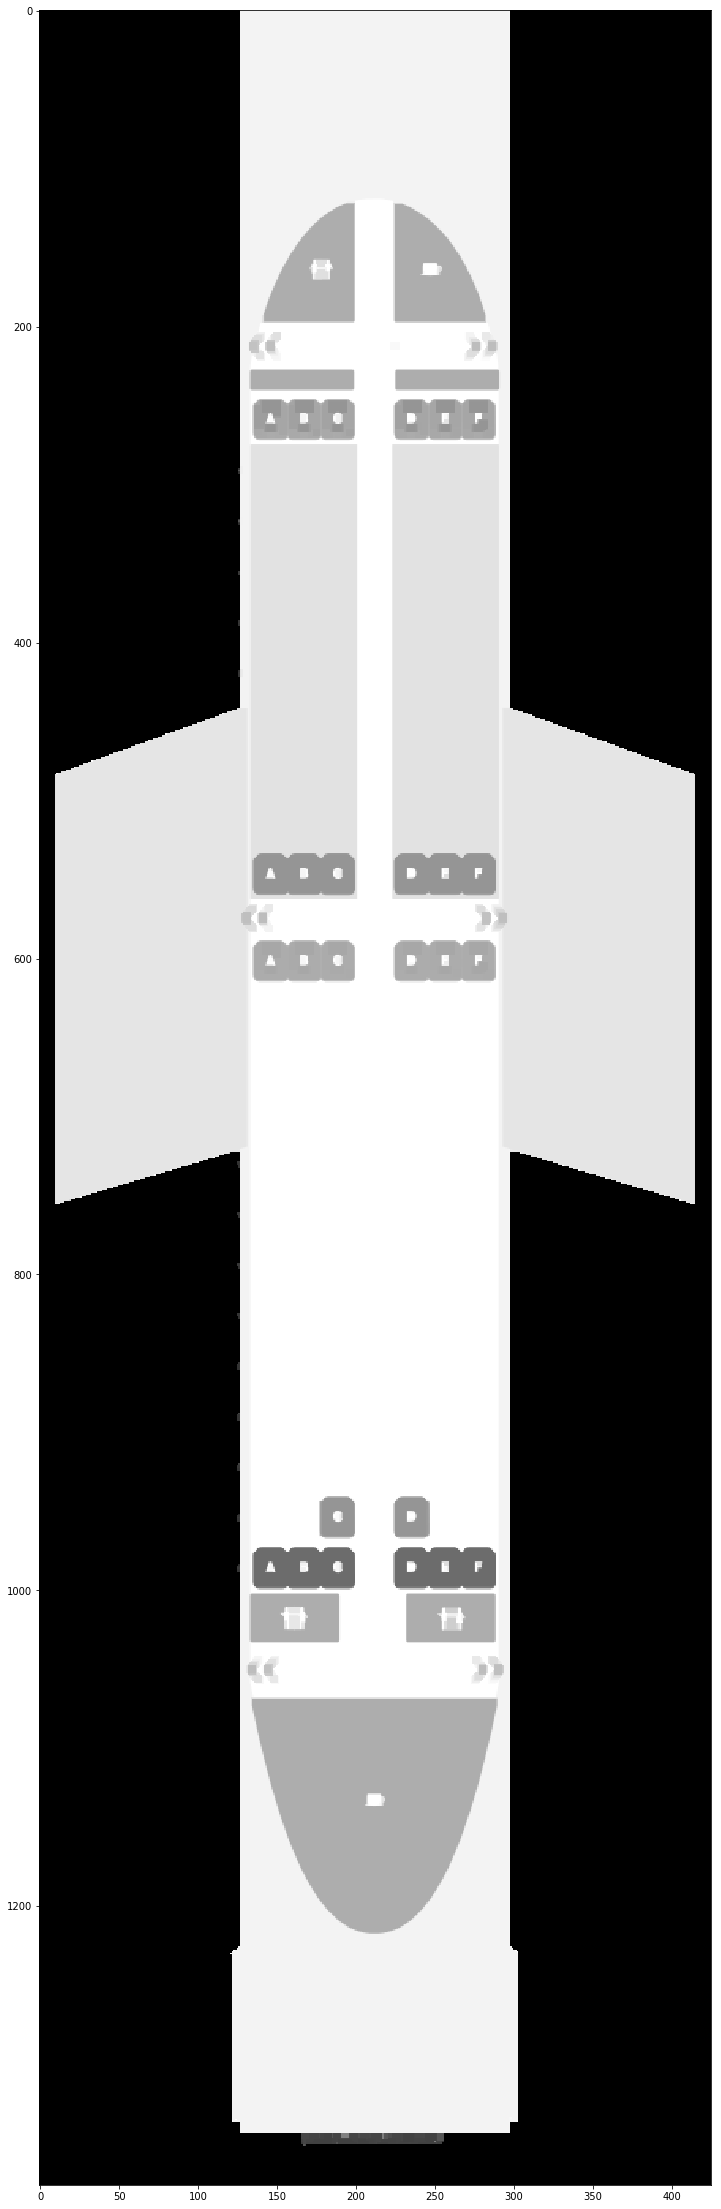

In [18]:
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(imgray, cv.MORPH_CLOSE, kernel)
plt.figure(figsize=(20,40))
plt.imshow(closing, cmap='gray')

# Morphological gradient

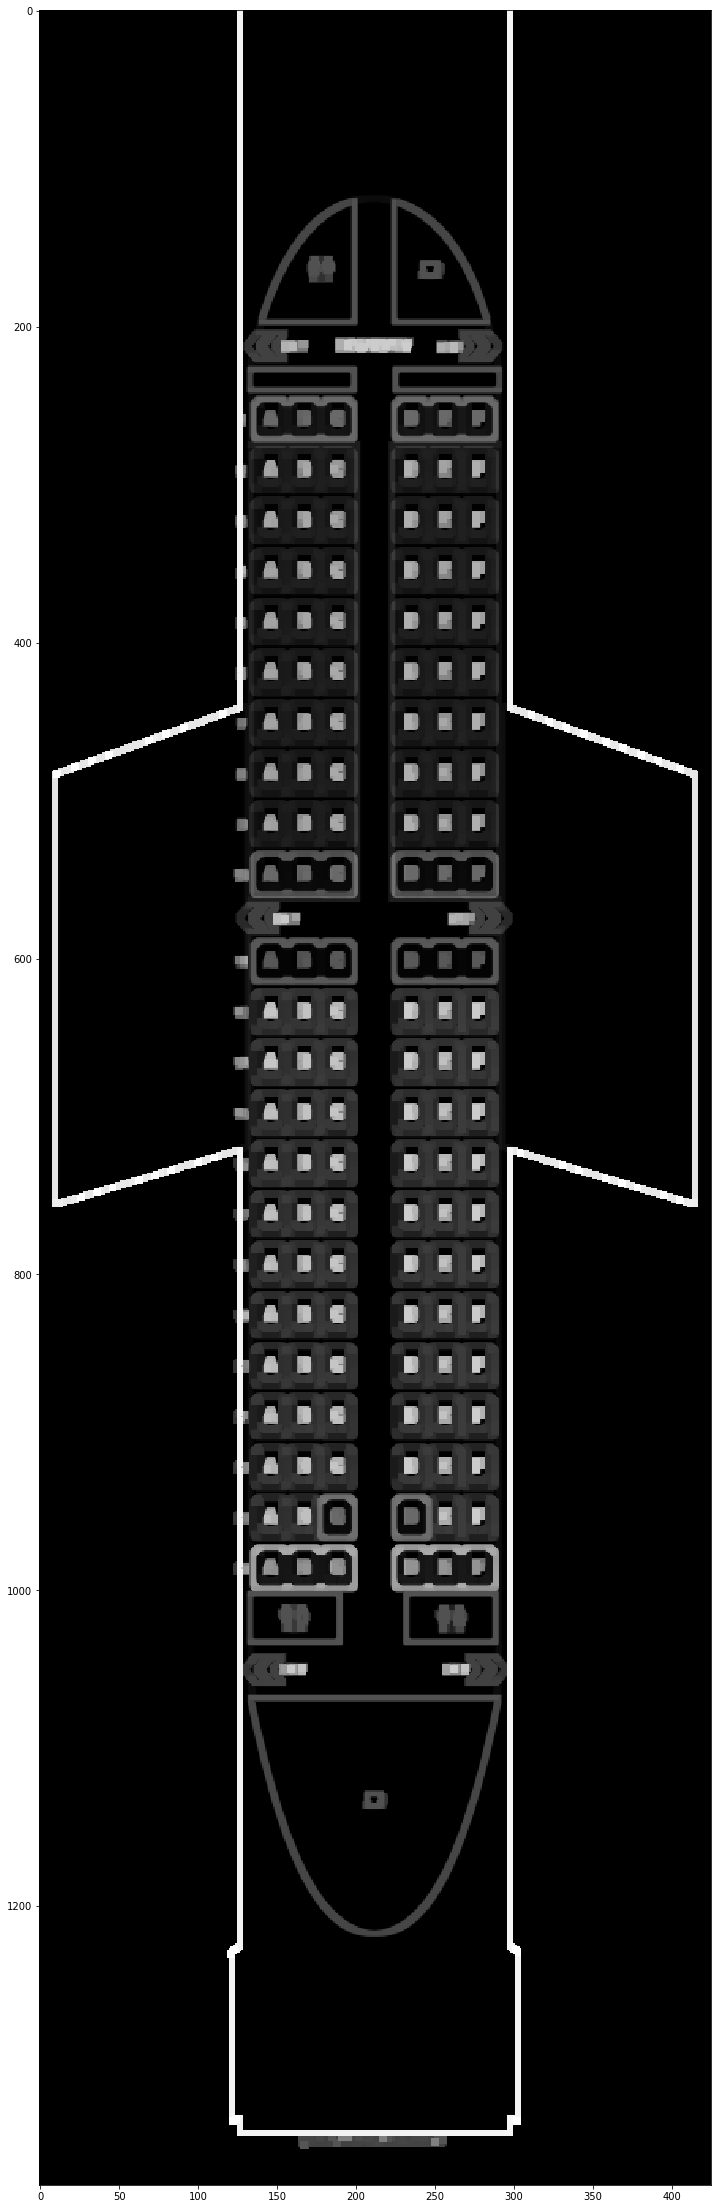

In [19]:
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(imgray, cv.MORPH_GRADIENT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(gradient, cmap='gray')

# Top hat

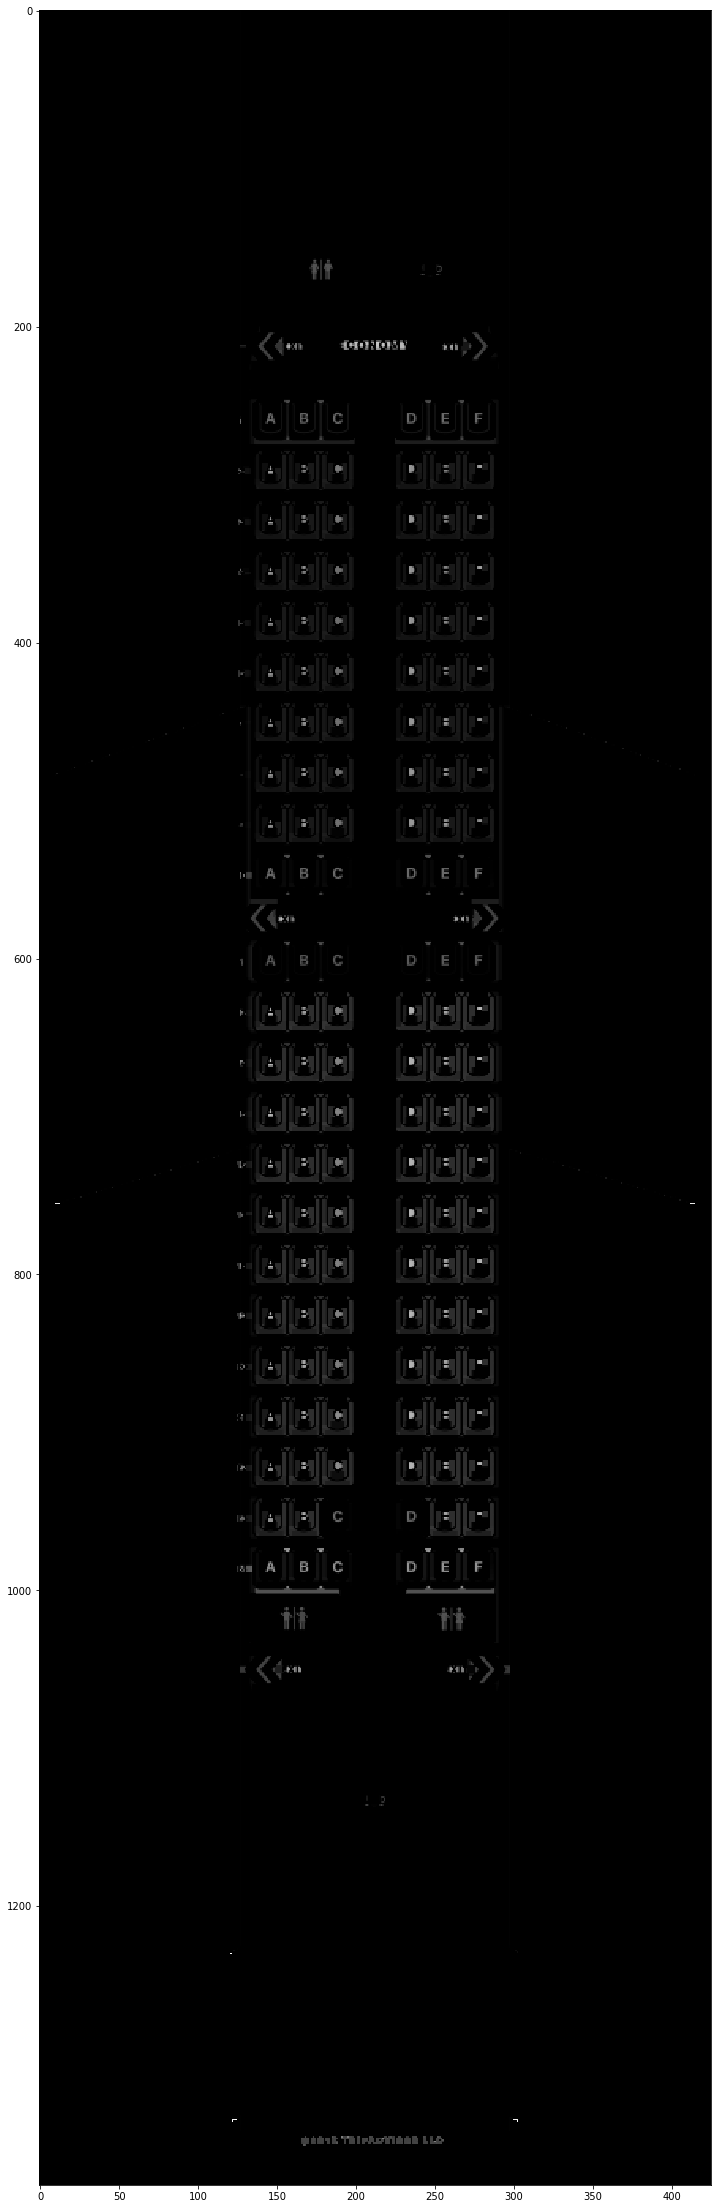

In [20]:
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(imgray, cv.MORPH_TOPHAT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(tophat, cmap='gray')

# Black hat

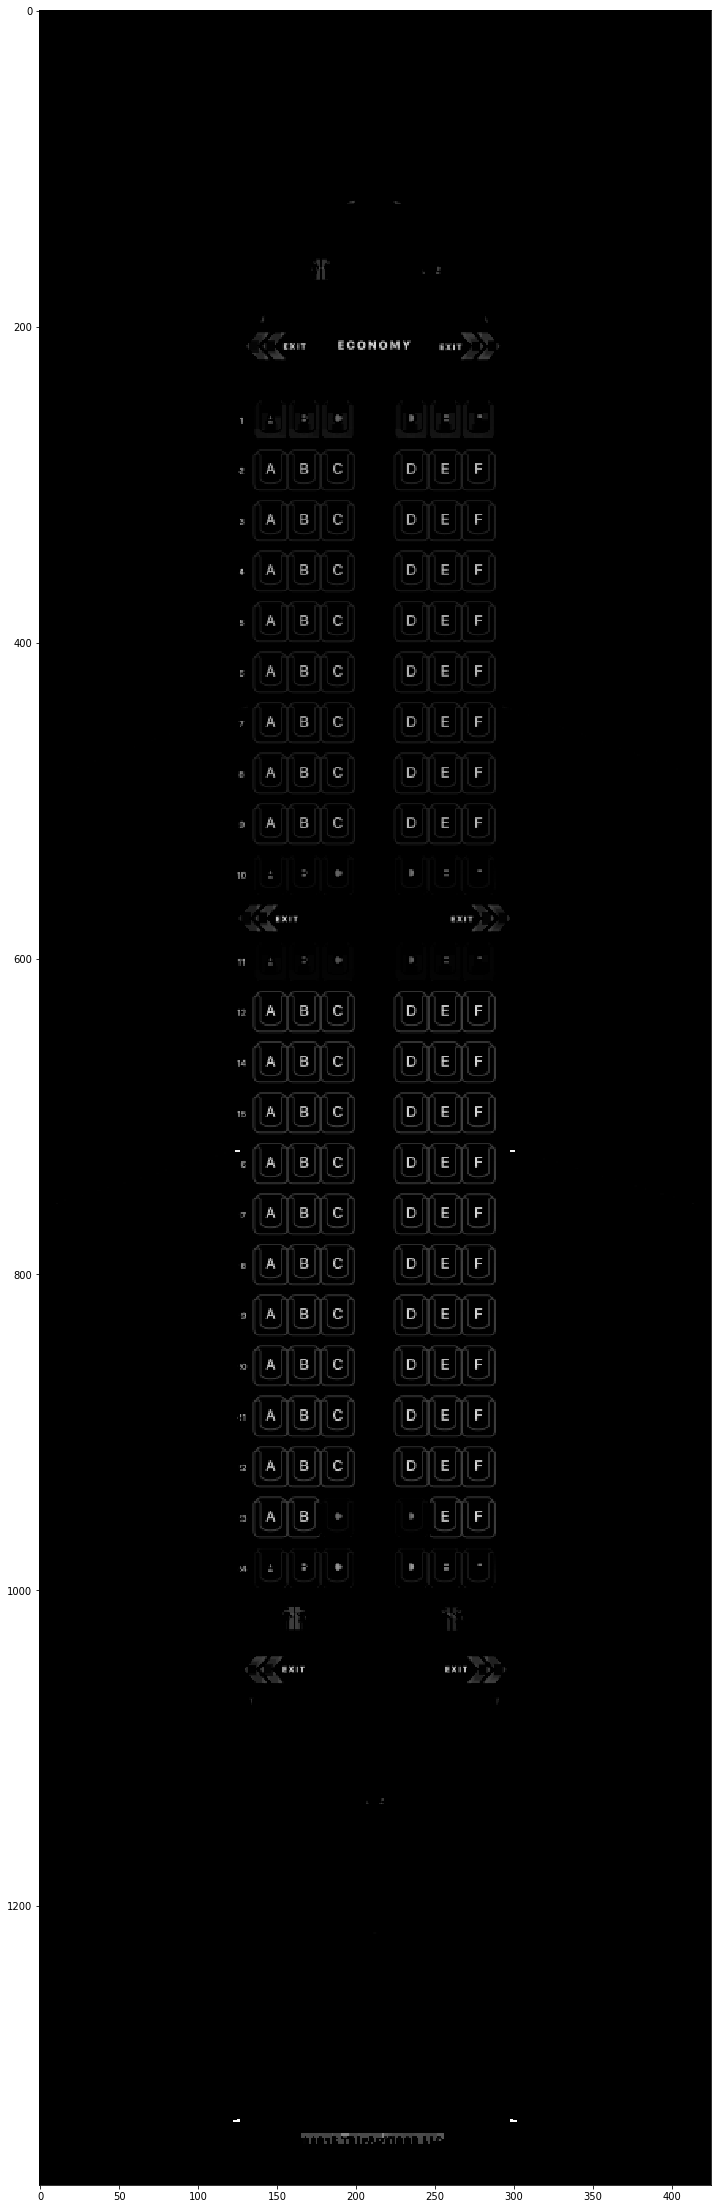

In [21]:
kernel = np.ones((5,5),np.uint8)
blackhat = cv.morphologyEx(imgray, cv.MORPH_BLACKHAT, kernel)
plt.figure(figsize=(20,40))
plt.imshow(blackhat, cmap='gray')

# Moyenne 

In [22]:
df

,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,Recline,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
Data_Source,,,,,,,,,,,,,,,,,,,,,
SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,BULKHEAD,NaN,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,NaN,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,EXIT_ROW,NaN,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,NaN,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,NaN,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1
SeatGuru,aegean-airlines,Airbus A320-200,ECONOMY,short haul,174,174,Economy,STANDARD,BULKHEAD,NaN,...,18.0,NaN,NaN,YES,OVERHEAD,NONE,NaN,NONE,NaN,2
SeatGuru,aegean-airlines,Airbus A320-200,ECONOMY,short haul,174,174,Economy,STANDARD,NORMAL,NaN,...,18.0,NaN,NaN,YES,OVERHEAD,NONE,NaN,NONE,NaN,2
SeatGuru,aegean-airlines,Airbus A320-200,ECONOMY,short haul,174,174,Economy,STANDARD,EXIT_ROW,NaN,...,18.0,NaN,NaN,YES,OVERHEAD,NONE,NaN,NONE,NaN,2
SeatGuru,aegean-airlines,Airbus A320-200,ECONOMY,short haul,174,174,Economy,STANDARD,EXIT_ROW,NaN,...,18.0,NaN,NaN,YES,OVERHEAD,NONE,NaN,NONE,NaN,5


In [23]:
df['Airline_name']

Data_Source
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru           aeroflot
SeatGuru           aeroflot
SeatGuru           aeroflot
SeatGuru           aeroflot
                 ...       
SeatGuru    xiamen-airlines
SeatGuru    xiamen-airlines
SeatGuru    xiamen-airlines
SeatGuru    xiamen-airlines
SeatGuru

In [24]:
test = []

In [25]:
np.unique(df['Airline_name'])
#Donne les différentes compagnies présentes

array(['aegean-airlines', 'aer-lingus', 'aeroflot',
       'aerolineas-argentinas', 'aeromexico', 'air-austral', 'air-canada',
       'air-caraibes', 'air-china', 'air-europa', 'air-france',
       'air-india', 'air-india-express', 'air-italy', 'air-namibia',
       'air-new-zealand', 'air-serbia', 'air-tahiti-nui', 'air-transat',
       'air-vanuatu', 'airasia', 'airasia-x', 'aircalin',
       'alaska-airlines', 'alitalia', 'allegiant', 'american-airlines',
       'ana', 'asiana', 'atlasglobal', 'austrian', 'avianca',
       'azerbaijan-hava-yollary', 'azores-airlines', 'azul',
       'bangkok-airways', 'british-airways', 'brussels-airlines',
       'cathay-pacific', 'cebu-pacific-air', 'china-airlines',
       'china-eastern', 'china-southern', 'condor', 'copa-airlines',
       'croatia-airlines', 'czech-airlines', 'delta', 'dragonair',
       'easyjet', 'edelweiss-air', 'egyptair', 'el-al', 'emirates',
       'ethiopian-airlines', 'etihad', 'eurowings', 'eva-air',
       'fiji-airwa

In [26]:
np.unique(df['Aircraft_Type'])


array([' Airbus 320', ' Airbus A319', ' Airbus A319 V2', ' Airbus A320',
       ' Airbus A320 V2', ' Airbus A320 V3', ' Airbus A321',
       ' Boeing 767-300', ' Boeing 767-300 V2', ' Boeing 787 Dreamliner',
       ' Boeing 787-900', '-800 D', '7-800', '737-600', '737-800',
       '737-800 A', '737-800 B', '737-800 C', '737-800 V3', '747-400 A',
       '747-400 B', '747-400 C', '757-200 V1', '767-300ER',
       '777-200ER V1', '777-200ER V2', '777-200LR', '777-300',
       '777-300 ER', '777-300ER', '777-300ER 4class', '787-8', '787-800',
       '787-800 B', '787-9 V2', '787-9 V3', '787-900', '789-9', 'A319',
       'A319 V2', 'A319-100', 'A319-100 A', 'A319-100 B', 'A319-111',
       'A320', 'A320-200', 'A320-200 A', 'A320-200 B', 'A320-200 C',
       'A320-200 V1', 'A320-200 V2', 'A321', 'A321neo', 'A330-200',
       'A330-200 A', 'A330-300', 'A330-300 V1', 'A340-300', 'A340-542',
       'A350', 'A350-900', 'A350-900 V2', 'A380 C', 'A380 D',
       'AA Airbus A321neo', 'AA Boeing 737

In [28]:
df['Airline_name']

Data_Source
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru    aegean-airlines
SeatGuru           aeroflot
SeatGuru           aeroflot
SeatGuru           aeroflot
SeatGuru           aeroflot
                 ...       
SeatGuru    xiamen-airlines
SeatGuru    xiamen-airlines
SeatGuru    xiamen-airlines
SeatGuru    xiamen-airlines
SeatGuru

In [42]:
tri = df.groupby(['Airline_name','Aircraft_Type']).agg(list)
tri

Category  \
Airline_name          Aircraft_Type                                                                                 
aegean-airlines       ATR 42-600                                    [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY]   
                      Airbus A319-100                               [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY]   
                      Airbus A320-200                           [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
                      Airbus A321-200                           [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
                      Bombardier Dash 8 Q400                                          [ECONOMY, ECONOMY, ECONOMY]   
aer-lingus            Airbus A320                               [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
                      Airbus A321                                   [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY]   
                      Airbus A330-200                           [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
                      Airbus A330-200 B                         [ECONOMY, ECONOMY, ECONOMY, BUSINESS, ECONOMY,...   
                      Airbus A330-300 A                         [BUSINESS, ECONOMY, ECONOMY, BUSINESS, ECONOMY...   
                      Boeing 757-200                            [BUSINESS, ECONOMY, BUSINESS, ECONOMY, ECONOMY...   
aeroflot              Russian Airlines Airbus 330 200           [BUSINESS, ECONOMY, ECONOMY, BUSINESS, ECONOMY...   
                      Russian Airlines Airbus A320              [BUSINESS, ECONOMY, ECONOMY, BUSINESS, ECONOMY...   
                      Russian Airlines Airbus A320 V2           [BUSINESS, ECONOMY, ECONOMY, ECONOMY, BUSINESS...   
                      Russian Airlines Airbus A321              [BUSINESS, ECONOMY, ECONOMY, ECONOMY, BUSINESS...   
                      Russian Airlines Airbus A321 V2           [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Russian Airlines Airbus A321 V3           [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Russian Airlines Airbus A330 300 V2       [BUSINESS, ECONOMY, ECONOMY, BUSINESS, ECONOMY...   
                      Russian Airlines Airbus A330 300 V3       [BUSINESS, ECONOMY, ECONOMY, ECONOMY, BUSINESS...   
                      Russian Airlines Boeing 737-800           [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Russian Airlines Boeing 777-300ER         [BUSINESS, PREMIUM, PREMIUM, PREMIUM, ECONOMY,...   
                      Russian Airlines Sukhoi Superjet 100-95B  [BUSINESS, ECONOMY, BUSINESS, ECONOMY, ECONOMY...   
aerolineas-argentinas Airbus A330-200                           [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
                      Airbus A340-300                           [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Boeing 737-700                            [BUSINESS, ECONOMY, ECONOMY, BUSINESS, ECONOMY...   
                      Boeing 737-800                            [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
aeromexico            AM Boeing 737 MAX 8                       [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Boeing 737-700 V2                         [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Boeing 737-800 B                          [BUSINESS, ECONOMY, ECONOMY, ECONOMY, ECONOMY,...   
                      Boeing 737-800 C                          [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
...                                                                                                           ...   
vistara               Airbus A320neo                            [BUSINESS, ECONOMY, ECONOMY, ECONOMY, BUSINESS...   
viva-aerobus          Airbus A320                               [ECONOMY, ECONOMY, ECONOMY, ECONOMY, ECONOMY, ...   
          

In [44]:
#nombre de sieges par avion
nbre=[]
for i in range(len(tri)):
    nbre.insert(i,tri['Total_seat'].iloc[i][0])
nbre

[48,
 138,
 174,
 196,
 78,
 174,
 212,
 271,
 266,
 317,
 177,
 241,
 140,
 158,
 170,
 183,
 183,
 296,
 301,
 158,
 402,
 87,
 272,
 280,
 128,
 170,
 166,
 124,
 160,
 186,
 243,
 274,
 76,
 99,
 98,
 64,
 162,
 438,
 262,
 169,
 120,
 146,
 183,
 185,
 292,
 18,
 211,
 300,
 400,
 450,
 251,
 298,
 76,
 50,
 75,
 37,
 50,
 73,
 97,
 74,
 136,
 200,
 282,
 70,
 74,
 303,
 318,
 354,
 381,
 389,
 128,
 158,
 185,
 177,
 237,
 284,
 301,
 128,
 167,
 159,
 344,
 365,
 310,
 311,
 293,
 299,
 180,
 302,
 122,
 66,
 48,
 72,
 118,
 129,
 142,
 152,
 165,
 158,
 178,
 184,
 212,
 208,
 275,
 516,
 95,
 309,
 280,
 312,
 312,
 381,
 468,
 296,
 324,
 276,
 100,
 72,
 50,
 76,
 100,
 122,
 144,
 168,
 140,
 182,
 423,
 241,
 342,
 259,
 189,
 260,
 178,
 112,
 244,
 37,
 68,
 168,
 171,
 312,
 342,
 302,
 275,
 50,
 254,
 66,
 70,
 128,
 155,
 144,
 296,
 294,
 244,
 345,
 375,
 346,
 144,
 189,
 184,
 70,
 170,
 180,
 186,
 377,
 146,
 282,
 16,
 119,
 149,
 146,
 185,
 124,
 159,
 181,


In [46]:
col = tri.columns[:2]
final_list = []
for tuple_, to_add in zip(list(tri.index), nbre):
    final_list.append([tuple_[0], tuple_[1], to_add])
final_list

[['aegean-airlines', 'ATR 42-600', 48],
 ['aegean-airlines', 'Airbus A319-100', 138],
 ['aegean-airlines', 'Airbus A320-200', 174],
 ['aegean-airlines', 'Airbus A321-200', 196],
 ['aegean-airlines', 'Bombardier Dash 8 Q400', 78],
 ['aer-lingus', 'Airbus A320', 174],
 ['aer-lingus', 'Airbus A321', 212],
 ['aer-lingus', 'Airbus A330-200', 271],
 ['aer-lingus', 'Airbus A330-200 B', 266],
 ['aer-lingus', 'Airbus A330-300 A', 317],
 ['aer-lingus', 'Boeing 757-200', 177],
 ['aeroflot', 'Russian Airlines Airbus 330 200', 241],
 ['aeroflot', 'Russian Airlines Airbus A320', 140],
 ['aeroflot', 'Russian Airlines Airbus A320 V2', 158],
 ['aeroflot', 'Russian Airlines Airbus A321', 170],
 ['aeroflot', 'Russian Airlines Airbus A321 V2', 183],
 ['aeroflot', 'Russian Airlines Airbus A321 V3', 183],
 ['aeroflot', 'Russian Airlines Airbus A330 300 V2', 296],
 ['aeroflot', 'Russian Airlines Airbus A330 300 V3', 301],
 ['aeroflot', 'Russian Airlines Boeing 737-800', 158],
 ['aeroflot', 'Russian Airlines 

In [47]:
somme = 0
count = 0
for i in range(len(tri)):
    somme = somme + float(nbre[i])
    count = count + 1
somme
count

1158

In [48]:
moyenne_globale = somme / count
moyenne_globale

208.926597582038

In [67]:
final_list

[['aegean-airlines', 'ATR 42-600', 48],
 ['aegean-airlines', 'Airbus A319-100', 138],
 ['aegean-airlines', 'Airbus A320-200', 174],
 ['aegean-airlines', 'Airbus A321-200', 196],
 ['aegean-airlines', 'Bombardier Dash 8 Q400', 78],
 ['aer-lingus', 'Airbus A320', 174],
 ['aer-lingus', 'Airbus A321', 212],
 ['aer-lingus', 'Airbus A330-200', 271],
 ['aer-lingus', 'Airbus A330-200 B', 266],
 ['aer-lingus', 'Airbus A330-300 A', 317],
 ['aer-lingus', 'Boeing 757-200', 177],
 ['aeroflot', 'Russian Airlines Airbus 330 200', 241],
 ['aeroflot', 'Russian Airlines Airbus A320', 140],
 ['aeroflot', 'Russian Airlines Airbus A320 V2', 158],
 ['aeroflot', 'Russian Airlines Airbus A321', 170],
 ['aeroflot', 'Russian Airlines Airbus A321 V2', 183],
 ['aeroflot', 'Russian Airlines Airbus A321 V3', 183],
 ['aeroflot', 'Russian Airlines Airbus A330 300 V2', 296],
 ['aeroflot', 'Russian Airlines Airbus A330 300 V3', 301],
 ['aeroflot', 'Russian Airlines Boeing 737-800', 158],
 ['aeroflot', 'Russian Airlines 

In [64]:
final_list[2][0]

'aegean-airlines'

In [119]:
#Calcule le nombre de sièges moyen par compagnie
i = 1
somme = final_list[0][2]
count = 1
moyenne_compagnie = []
compagnie = []
for i in range(1,len(final_list)):
    if final_list[i][0] == final_list[i-1][0]:
        somme = somme + final_list[i][2]
        count = count + 1
    else:
        moyenne = somme/count
        moyenne_compagnie.insert(i,somme / count)
        compagnie.insert(i,final_list[i-1][0])
        somme = final_list[i][2]
        count = 1

In [121]:
#Relis le nombre de siège moyen à sa compagnie :
seat_by_company=[]
for compagnie, to_add in zip(compagnie, moyenne_compagnie):
    seat_by_company.append([compagnie, to_add])
seat_by_company

[['aegean-airlines', 126.8],
 ['aer-lingus', 236.16666666666666],
 ['aeroflot', 210.8181818181818],
 ['aerolineas-argentinas', 212.5],
 ['aeromexico', 158.44444444444446],
 ['air-austral', 231.5],
 ['air-canada', 173.875],
 ['air-caraibes', 269.85714285714283],
 ['air-china', 236.46666666666667],
 ['air-europa', 225.75],
 ['air-france', 202.46666666666667],
 ['air-india', 224.55555555555554],
 ['air-india-express', 189.0],
 ['air-italy', 219.0],
 ['air-namibia', 131.0],
 ['air-new-zealand', 211.0],
 ['air-serbia', 136.16666666666666],
 ['air-tahiti-nui', 295.0],
 ['air-transat', 261.0],
 ['air-vanuatu', 120.0],
 ['airasia', 183.0],
 ['airasia-x', 377.0],
 ['aircalin', 148.0],
 ['alaska-airlines', 133.0],
 ['alitalia', 174.66666666666666],
 ['allegiant', 166.5],
 ['american-airlines', 154.3030303030303],
 ['ana', 235.65],
 ['asiana', 265.92857142857144],
 ['atlasglobal', 168.0],
 ['austrian', 169.85714285714286],
 ['avianca', 166.0],
 ['azerbaijan-hava-yollary', 169.0],
 ['azores-airlin